<a href="https://colab.research.google.com/github/wakayamahiro/owa/blob/main/AND%E5%9B%9E%E8%B7%AF%E3%82%92%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##入力２、出力１としたAND出力を学習するPythonプログラムを作成

In [1]:
import random
import numpy as np

#入力を0か1かランダムで選ぶ
x1 = [0, 1]

#入力をいれる所
x = []

#重みを２つ初期値で作る（毎回更新される）
w = np.random.rand(2,)


#重みを経過を入れておく
yoi_w1 = []
yoi_w2 = []

#正解率で使用（合ってたら[1]違ったら[0]）を入れる
ac = []
ac_ver = []
j = 0


#############################重みを考える######################################
for i in range(80):

#入力の値をランダムにxのリストに入れる。
  for i in range(2):
    x2 = random.choice(x1)
    x.append(x2)

#パーセプトロンの式
  an = x[0] * w[0] + x[1] * w[1]

  yoi_w1.append(w[0])
  yoi_w2.append(w[1])



########出した数字と答えの誤差を求める################
#(数字-答え)の二乗
  if x[0]==1:
    if x[1]==1:
      gosa = (an - 1)**2
    else:
      gosa = (an - 0)**2
  else:
    gosa = (an - 0)**2

  #print('gosa',gosa)


#################重みを調整する#########################

#[1][1]以外の重み変更の関数
  def kosin():
    if gosa<=0.1:
      ac.append(1)
      pass
    else:
      #print('重みの変更')
      ac.append(0)
      w[0] = w[0] + 0.5*(0-an)*an*(1-an)*x[0]
      w[1] = w[1] + 0.5*(0-an)*an*(1-an)*x[1]

#######################

  if x[0]==1:
    if x[1]==1:
#[1][1]
      if gosa<=0.1:
        ac.append(1)
        pass
      else:
        #print('重みの変更')
        ac.append(0)
        w[0] = w[0] + 0.5*(1-an)*an*(1-an)*x[0]
        w[1] = w[1] + 0.5*(1-an)*an*(1-an)*x[1]

#[1][0]
    else:
      kosin()

#[0][1]
  else:
    if x[1]==1:
      kosin()

#[0][0]
    else:
      kosin()

###############################################################

#入力をリセット
  x = []


  j = j + 1
  #print(j)
  #print(ac)


  if 5 <= len(ac) <=20-5:
    ac_ver.append(sum(ac[-5:-1])/4)


print(ac_ver)

[0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.5, 0.75, 0.5]


##重みがどのように更新されたかをグラフにする

正解率がどれくらいか調べる

w1,w2どちらも大体「0.3ちょい上」くらいに近づく

w1= 0.38386340882746495
w2= 0.3055991281552489


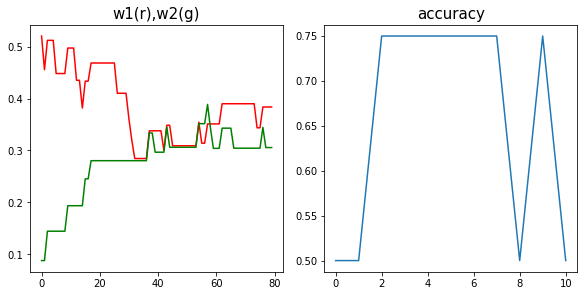

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].plot(yoi_w1,c='r')
axs[0].plot(yoi_w2,c='g')
axs[1].plot(ac_ver)

# グラフのタイトル
axs[0].set_title("w1(r),w2(g)", fontsize = 15)
axs[1].set_title("accuracy", fontsize = 15)


print('w1=',yoi_w1[-1])
print('w2=',yoi_w2[-1])

##最後にテストをする

In [3]:
#xに全４種類のパターン入れる
x = [[0,0],[0,1],[1,0],[1,1]]

#答えをいれる所
ans = []

#全４種類のパターンの計算する
#重みは上で求めた最終的な値を使用する

for i in range(4):
  a_test = x[i][0] * yoi_w1[-1] + x[i][1] * yoi_w2[-1]

#0.5より小さかったら[0]大きかったら[1]
  if a_test <= 0.5:
    ans.append(0)
  else:
    ans.append(1)

#答えを表示
print(x)
print(ans)

[[0, 0], [0, 1], [1, 0], [1, 1]]
[0, 0, 0, 1]
